In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import cv2 as cv
import pickle


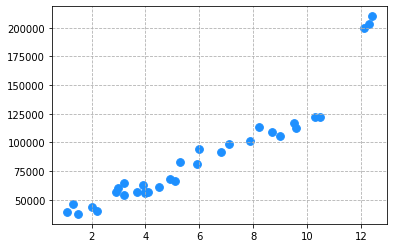

In [5]:
data = pd.read_csv("Salary_Data2.csv",header=0)
x=data[data.columns[0]]
y=data[data.columns[1]]

plt.grid(linestyle="--")
plt.scatter(x,y,s=60,color="dodgerblue",label="Samples")


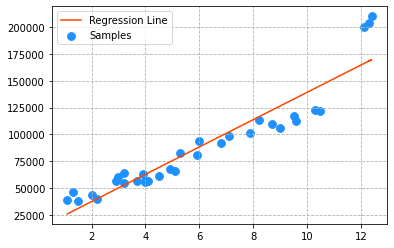

In [7]:
train_x=pd.DataFrame(x)
train_y=y


model = lm.LinearRegression()
model.fit(train_x,train_y)


#针对所有训练样本执行预测操作，绘制回归线
pred_train_y=model.predict(train_x)


#可视化
plt.grid(linestyle="--")
plt.scatter(train_x,train_y,s=60,color="dodgerblue",label="Samples")
plt.plot(train_x,pred_train_y,color="orangered",label="Regression Line")

plt.legend()




# 训练岭回归模型

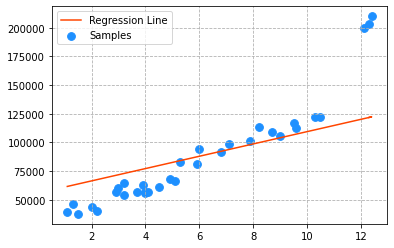

In [15]:
model=lm.Ridge(500)
model.fit(train_x,train_y)

#针对所有训练样本执行预测操作，绘制回归线
pred_train_y=model.predict(train_x)

#可视化
plt.grid(linestyle="--")
plt.scatter(train_x,train_y,s=60,color="dodgerblue",label="Samples")
plt.plot(train_x,pred_train_y,color="orangered",label="Regression Line")

plt.legend()


In [16]:
# 调整岭回归参数

params=np.arange(60,130,5)

for p in params:
    model = lm.Ridge(p)
    model.fit(train_x,train_y)
    test_x,test_y = train_x.iloc[:30:4],train_y.iloc[:30:4]
    pred_test_y=model.predict(test_x)
    
    #误差评估
    print(p,"->",sm.r2_score(test_y,pred_test_y))




60 -> 0.9079377012464043
65 -> 0.9103517840843116
70 -> 0.9123556127607111
75 -> 0.9139751047288491
80 -> 0.9152344834900279
85 -> 0.9161564017114546
90 -> 0.9167620543385843
95 -> 0.9170712826050363
100 -> 0.9171026697534422
105 -> 0.9168736292005816
110 -> 0.9164004858087551
115 -> 0.9156985508615196
120 -> 0.9147821912848049
125 -> 0.9136648936032749


In [54]:
x=pd.DataFrame(x)

test_index = np.random.randint(0,x.shape[0],int(x.shape[0]*0.2))
print(test_index)


def extract(d,index):
    if d not in index:
        return True
    else:
        return False

judge = x[x.columns[0]].apply(extract,args=[test_index])
judge


# train_x=x[x.index not in test_index]
# train_x


[17  2  0  4 19 31]


0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
Name: YearsExperience, dtype: bool